<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Ted-Talks-Views-Prediction-ML/blob/main/Copy_of_Ted_Talk_Views_Prediction_ML_Project_Gayatri_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TED Talk Views** **Prediction**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from skopt import BayesSearchCV
# from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Inserting the data file 
df=pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [4]:
df.shape

(4005, 19)

In [5]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [7]:
df.tail(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [8]:
df.duplicated().sum()

0

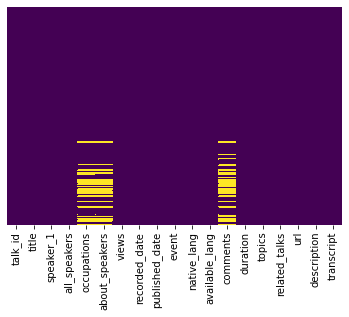

In [9]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (15, 5)

In [10]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [11]:
#dropping the url column
df=df.drop(columns=['url'])

# **3.2 Let's explore speaker_1 column**

In [12]:
#Extarcting the records of top 5 most viewed videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


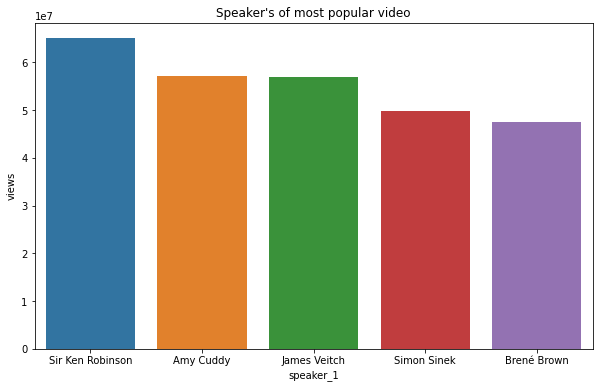

In [13]:
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=pop_df)

In [14]:
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977


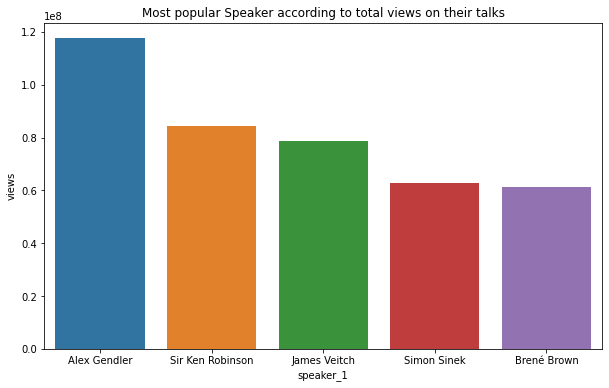

In [15]:
plt.figure(figsize=(10,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

# ** Let's explore the event column**

In [16]:
#printing the len of unique values in event column
len(df.event.unique())

459

In [17]:
#let's find the most frequent event categories
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


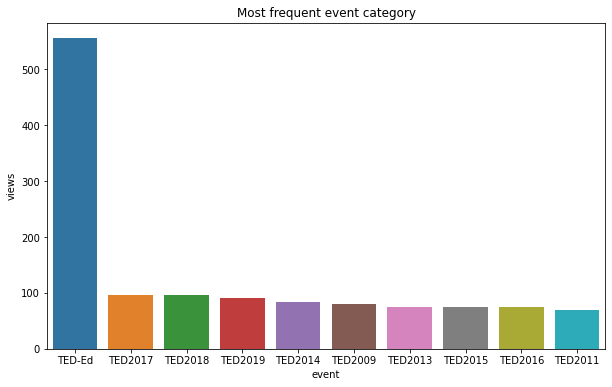

In [18]:
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

In [19]:
#let's find the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)

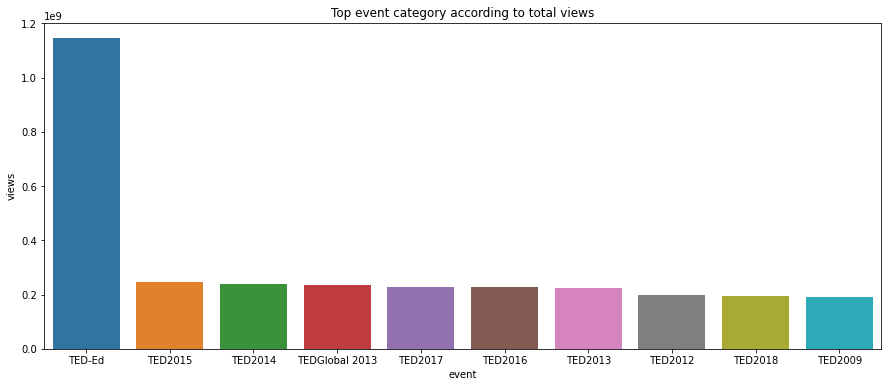

In [20]:
plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

In [21]:
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

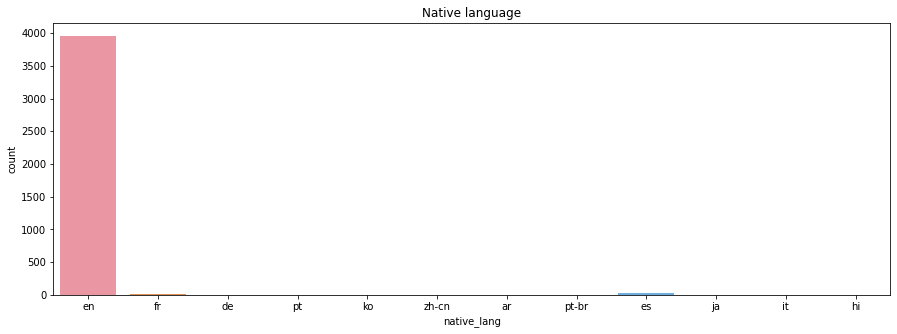

In [22]:
plt.title('Native language')
sns.countplot(df['native_lang'])

In [23]:
#Dropping the native_lang column
df.drop(columns='native_lang',inplace=True)

There are 157160 words in the combination of all titles.


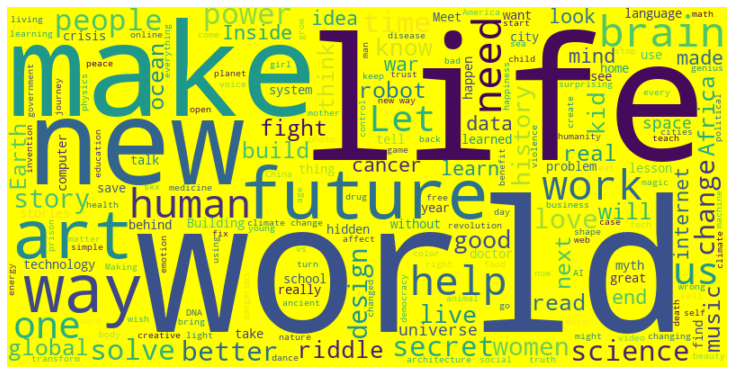

In [24]:
#making of word cloud from title column
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


Let's visualize most popular topic tags with word cloud

There are 404126 words in the combination of all topics.


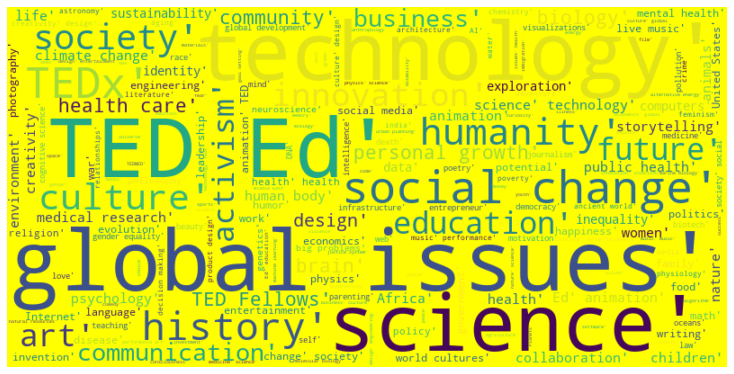

In [25]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Let's explore occupation column.

In [26]:
df['occupations'][0]

"{0: ['climate advocate']}"

In [27]:
df['occupations'].isna().sum()

522

We have 522 Nan values in occupations column.
Let's replace those NaN values with another category called 'other'.

In [28]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

In [29]:
#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [30]:
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

In [31]:
len(df['occupation'].unique())

1552

[Text(0.5, 1.0, "top 15 speaker's occupation")]

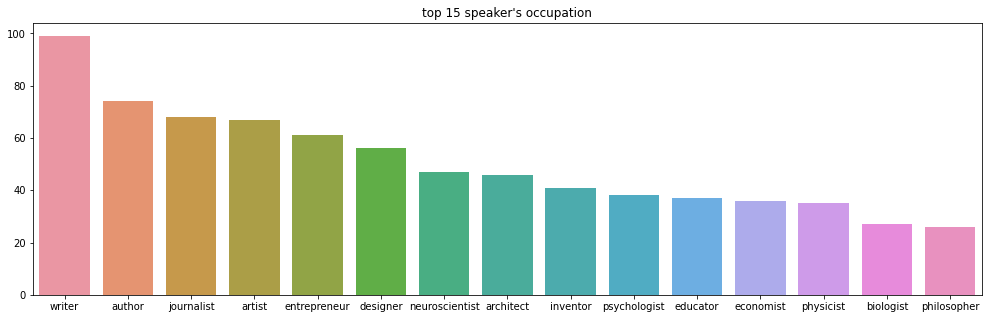

In [32]:
occ_df=df[df['occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_df['occupation'].value_counts(ascending=False).head(15).index, 
              y=occ_df['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 speaker's occupation")

In [33]:
occ_df['occupation'].value_counts()

writer                         99
author                         74
journalist                     68
artist                         67
entrepreneur                   61
                               ..
ornithologist                   1
macroencapsulator               1
gardener                        1
grassland ecosystem pioneer     1
law researcher                  1
Name: occupation, Length: 1551, dtype: int64

Let's make the world cloud for occupations column

There are 55651 words in the combination of all occupations.


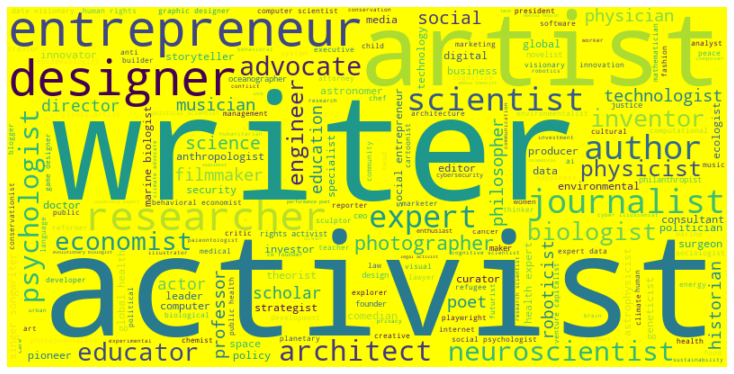

In [34]:
text = " ".join(occ for occ in occ_df.occupation.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="yellow", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Most of the speakers are activist folowed by writer, author and enterpreneur.

# **Let's explore published_date column**

In [35]:
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [36]:
#extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

I have extracted weekday month and year from published_date column and added three separate columns as:

release_day
release_month
release_year

In [37]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

Let's explore release_day column.

Checking the most frequent release day of the week.

In [38]:
#checking the day of the month having maximum release date 
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

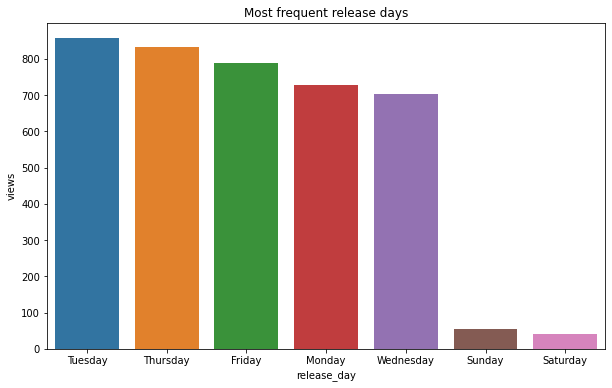

In [39]:
# checking the day of the week having maximum release date 
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

Let's check the best release day of the week with respect to average views

In [40]:
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

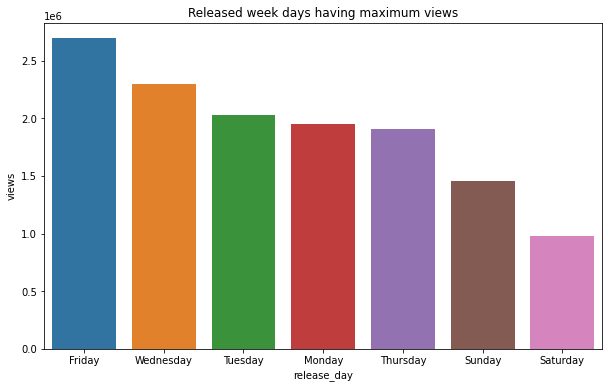

In [41]:
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

Most videos are published on Tuesday followed by Thursday.

But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

Friday release is impacting the views of the video

In [42]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

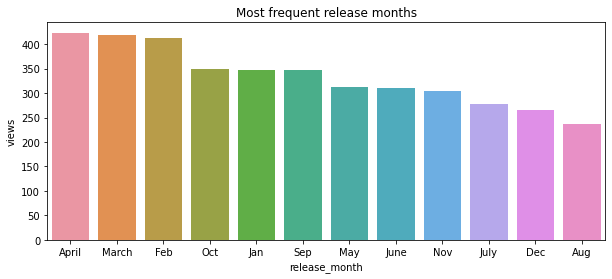

In [43]:
#checking months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
# checking the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

Most videos are released in April followed by March and Feb

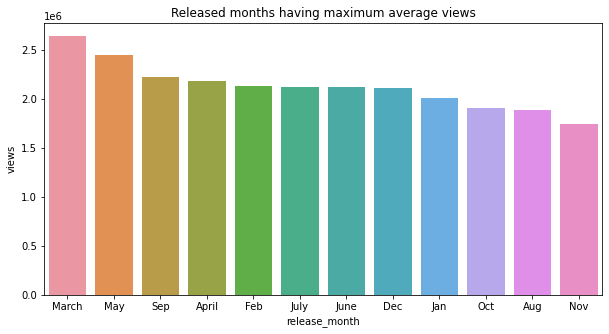

In [44]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

April have maximum released videos, But the videos released in March are more popular (i.e. have more average views) followed by May and Sep.

**Let's explore release_year column.**

Text(0.5, 1.0, 'Most frequent release years')

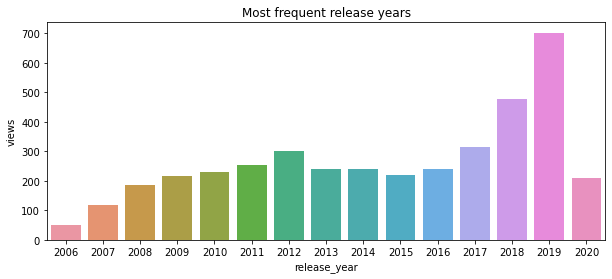

In [45]:
#checking years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)
#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

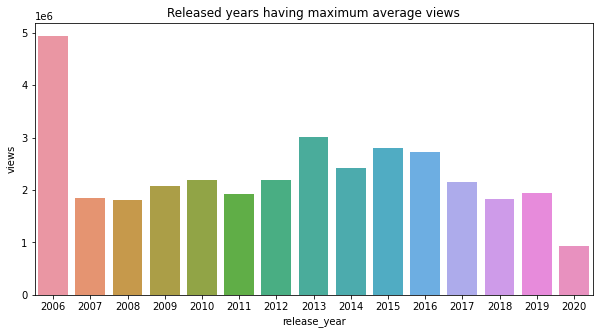

In [46]:
#Printing the most popular release years according to AVERAGE Views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

Most videos are published in 2019 followed by 2018 and 2017.

But the videos published in 2006 are most viewed followed by 2013 and 2015.

**Let's explore some numerical features.**

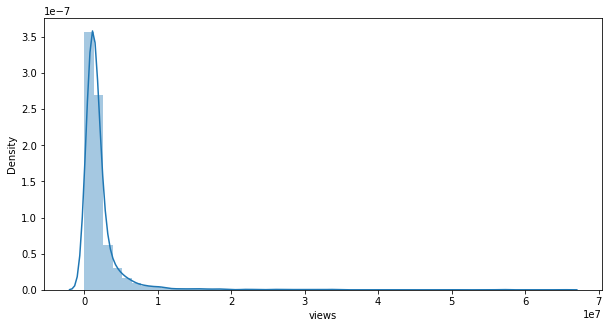

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

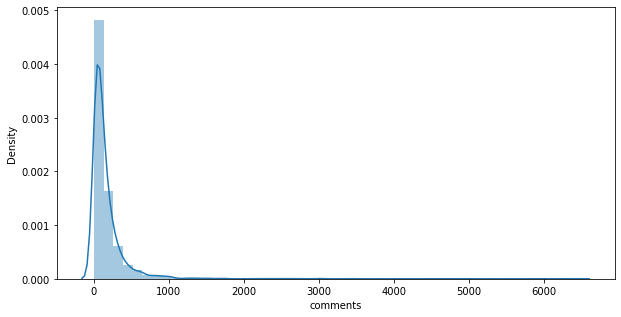

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

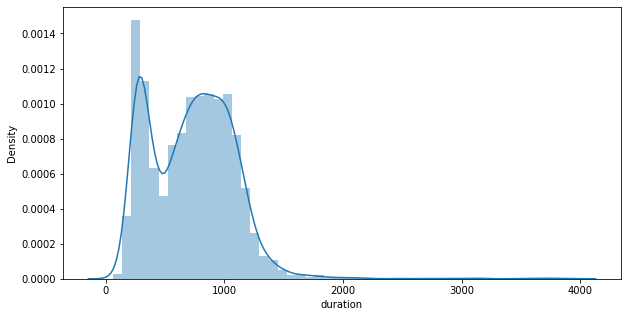

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

**Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.**

In [50]:
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

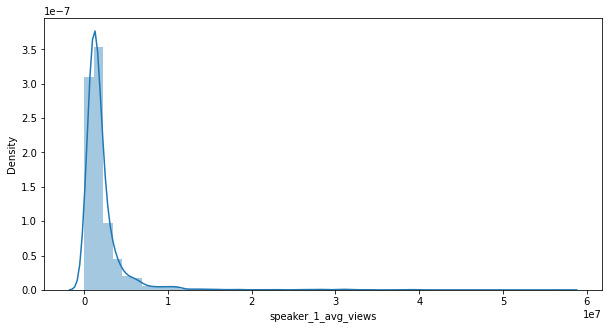

In [51]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

**Feature Engineering on event column**

In [52]:
event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [53]:
#introducing a new column called event category
df['event_category'] = 'Other'
#categorising each record into the new event_category column according to their event
for i in range(len(df)):
    if df['event'][i][0:5]=='TED20':
        df['event_category'][i] = 'TED2000s'
    elif df['event'][i][0:6]=='TED-Ed':
        df['event_category'][i] = 'TED-Ed'
    elif df['event'][i][0:5]=='TED19':
        df['event_category'][i] = 'TED1900s'
    elif df['event'][i][0:4]=='TEDx':
        df['event_category'][i] = "TEDx"
    elif df['event'][i][0:7]=='TED@BCG':
        df['event_category'][i] = 'TED@BCG'
    elif df['event'][i][0:4]=='TED@':
        df['event_category'][i] = "TED@"
    elif df['event'][i][0:8]=='TEDSalon':
        df['event_category'][i] = "TEDSalon"
    elif df['event'][i][0:9]=='TEDGlobal':
        df['event_category'][i] = 'TEDGlobal'
    elif df['event'][i][0:8]=='TEDWomen':
        df['event_category'][i] = 'TEDWomen'
    elif df['event'][i][0:6]=='TEDMED':
        df['event_category'][i] = 'TEDMED'
    elif df['event'][i][0:3]=='TED':
        df['event_category'][i] = 'TEDOther'

In [54]:
df.event_category.value_counts()

TED2000s     1178
TEDx          696
TED-Ed        561
TEDGlobal     516
TEDOther      349
TEDWomen      194
Other         144
TED@          128
TEDMED         92
TEDSalon       79
TED@BCG        59
TED1900s        9
Name: event_category, dtype: int64

Now, we have 12 unique values in the event_category column.

Majority of videos are in TED2000s category followed by TEDx and TED-Ed.

We can further use this feature while modelling by applying some encoding techniques.

We can drop the event column now.

In [55]:
#Let's drop event column
df=df.drop(columns='event')

**Feature Engineering on available_lang column**

In [56]:
#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [57]:
len(df['available_lang'][10])

26

Let's add a new feature which contain the count of total no of language for a particular video

In [58]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [59]:
#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

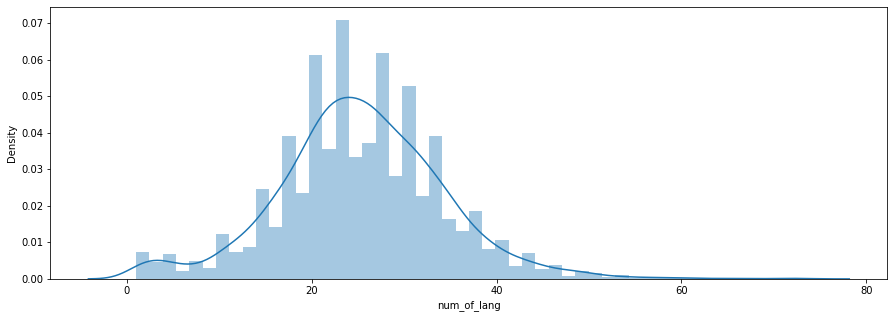

In [60]:
sns.distplot(df['num_of_lang'])

# **Feature Engineering on topics column**

In [61]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

The topics column basically contains the list of topic tags associated with each video.

In [62]:
df['topics'] = df.apply(lambda row: eval(row["topics"]), axis=1)

Let's add a new feature which contain the count of total no of topics for a particular video.

In [63]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

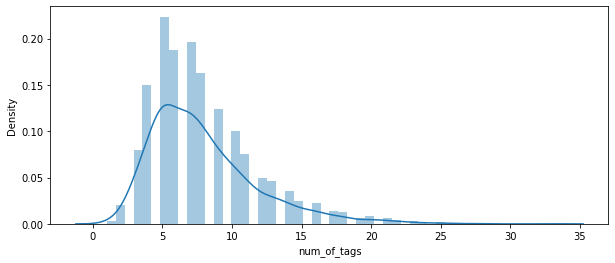

In [64]:
plt.figure(figsize=(10,4))
sns.distplot(df['num_of_tags'])

Now, let's do target encoding on topics column.

In [65]:
df['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [66]:
#extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)
      
len(unique_topics)

457

In [67]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [68]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

# **Feature Engineering on published_date column.**

We can add a new column called video_age which is the difference of current year and published year.

In [69]:
df['video_age']=2021-df['release_year']

Now, we can drop published_date column.

In [70]:
df=df.drop(columns='published_date')

# **Feature Engineering on related_talks column.**

In [71]:
#applying eval function on available_lang column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [72]:
df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

Related_talks column contains a dictionary containing information about six related videos with talk_id as key and video title as it's value.

We can take mean of the views of those six related talks for each video and can add as a new feature called related_views.

In [73]:
#defining a new feature called related_views
df['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

Let's plot the related_views column.

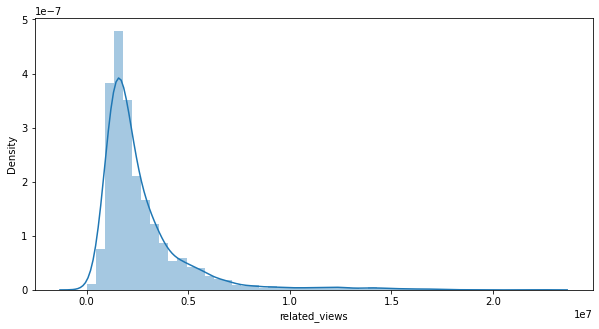

In [74]:
#Let's plot the related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

It's a skewed normal distribution.

# **Data Cleaning.**

Let's treat nan values of numerical columns using KNNImputer

In [76]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['duration','comments']])
df[['duration','comments']] = imputer.transform(df[['duration','comments']])

In [77]:
df[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

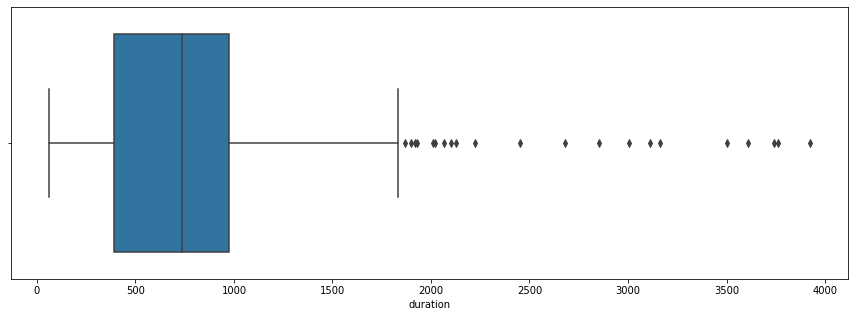

In [78]:
sns.boxplot(x=df['duration'])

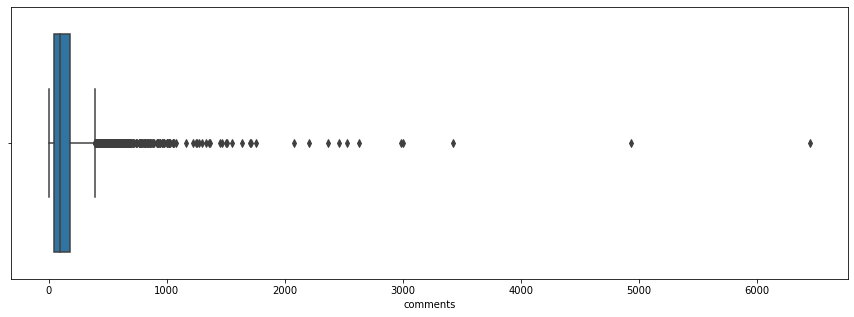

In [79]:
sns.boxplot(x=df['comments'])

We have some outliers in our numerical features.

**Outlier Treatment on numerical columns.**

In [80]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                 293
description                0
duration                  21
event_category             0
num_of_lang              121
num_of_tags              116
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views            300
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

We have outliers in few columns which needs to be treated well.

I am replacing the outliers with the extreme values.

In [81]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [82]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers             0
all_speakers               0
comments                   0
description                0
duration                   0
event_category             0
num_of_lang                0
num_of_tags                0
occupation                 0
occupations                0
recorded_date              0
related_talks              0
related_views              0
release_day                0
release_month              0
release_year               0
speaker_1                  0
speaker_1_avg_views        0
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views      0
transcript                 0
video_age                  0
views                      0
dtype: int64

Now, we don't have any outliers.

In [83]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'comments', 'duration',
       'topics', 'related_talks', 'description', 'transcript', 'occupation',
       'release_day', 'release_month', 'release_year', 'speaker_1_avg_views',
       'event_category', 'num_of_lang', 'num_of_tags', 'topics_wise_avg_views',
       'video_age', 'related_views'],
      dtype='object')

In [84]:
num_df=df[['views','comments','duration','num_of_lang','num_of_tags','video_age','related_views','speaker_1_avg_views','topics_wise_avg_views']]

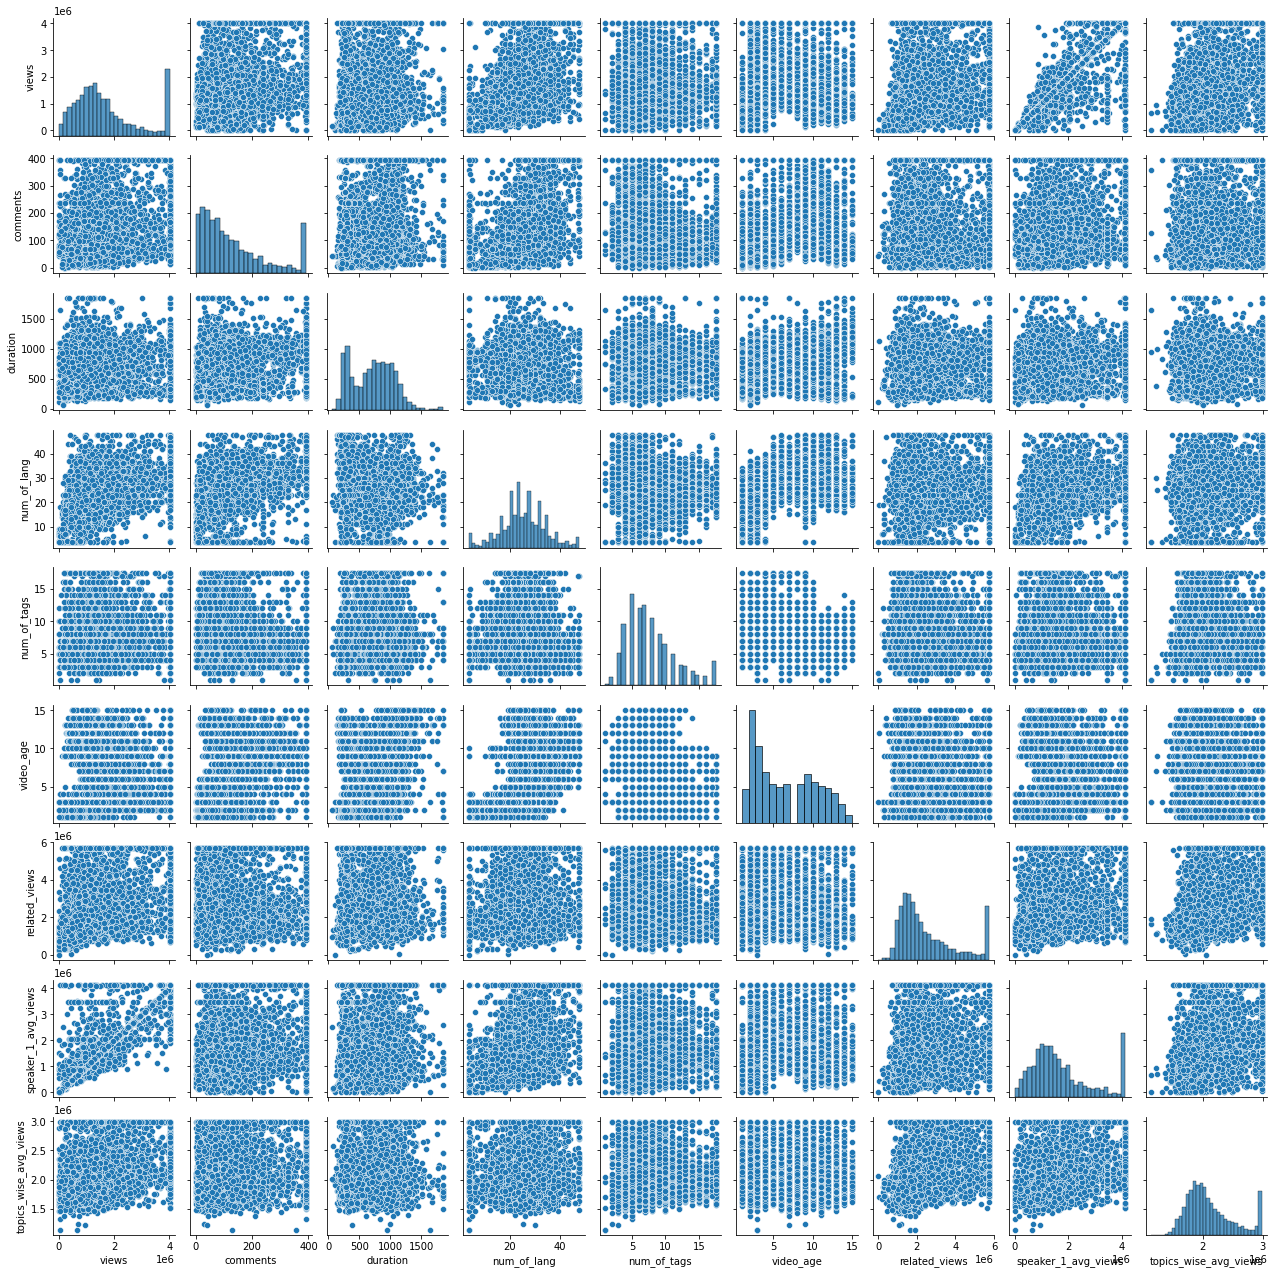

In [85]:
sns.pairplot(num_df,size=2)

# **Feature Selection**

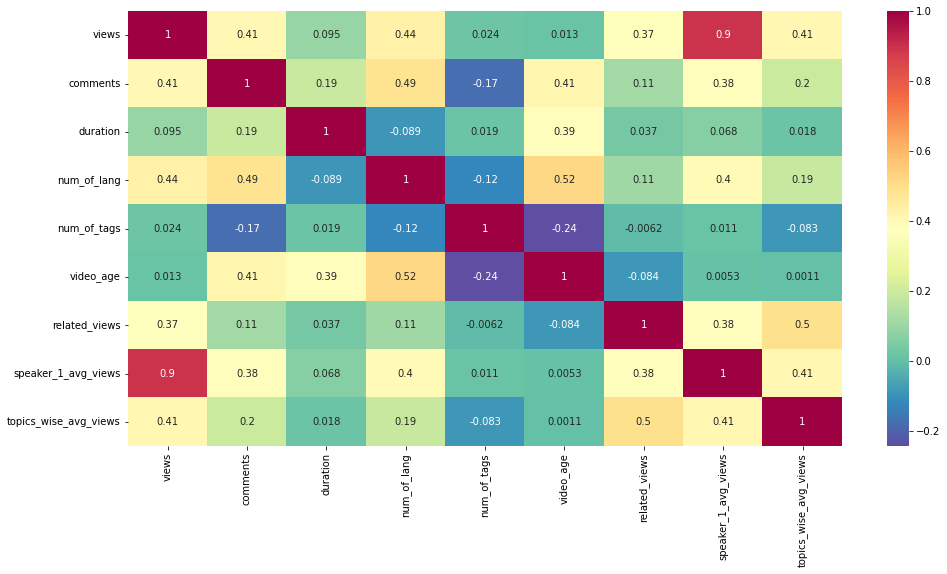

In [86]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(num_df.corr(),annot=True, cmap='Spectral_r')

In [87]:
df.shape

(4005, 25)

Taking important features from our dataframe.

In [88]:
df1=df[['views','comments','duration','num_of_lang','num_of_tags','release_day','release_month','video_age',
        'related_views','event_category','speaker_1_avg_views','topics_wise_avg_views']]

Doing one hot encoding using get_dummies function.

In [89]:
final_df=pd.get_dummies(df1)
final_df.shape

(4005, 40)

Now, we have around 40 features after one hot encoding.

Applying proper feature selection is must here to get rid of unimportant features.

In [90]:
X=final_df.drop(columns=['views'])
y=final_df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=121212)

In [91]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature selection for numerical features.

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [93]:
f_scores = f_regression(X, y)
f_scores

(array([7.93157493e+02, 3.63920086e+01, 9.43117088e+02, 2.22138034e+00,
        7.26280093e-01, 6.34241154e+02, 1.61894391e+04, 8.21343686e+02,
        4.93457071e+01, 2.14095360e+00, 1.69801520e+01, 1.32688878e+01,
        4.22782469e+00, 1.54608611e+00, 5.17596240e-03, 4.42937898e+00,
        5.29481408e-01, 3.19042540e+00, 9.10855944e-01, 3.61273001e+00,
        1.59320065e+00, 7.00546927e-01, 1.20164944e+01, 3.34840829e+00,
        3.24993722e+00, 6.69041425e+00, 1.59197663e+00, 4.59792903e+01,
        4.62916792e-01, 3.10594880e+00, 7.04017302e+01, 1.43088801e+00,
        1.74686740e+00, 1.47543441e+00, 7.34995399e-04, 1.08610825e+00,
        8.31622635e-01, 1.94150044e-02, 1.71138588e+01]),
 array([2.27765837e-159, 1.75975910e-009, 3.67017071e-186, 1.36190106e-001,
        3.94142602e-001, 4.87581533e-130, 0.00000000e+000, 1.81039118e-164,
        2.51061953e-012, 1.43491232e-001, 3.85368618e-005, 2.73265521e-004,
        3.98310726e-002, 2.13786984e-001, 9.42649939e-001, 3.53875

Text(0.5, 1.0, 'P-value scores for numerical features')

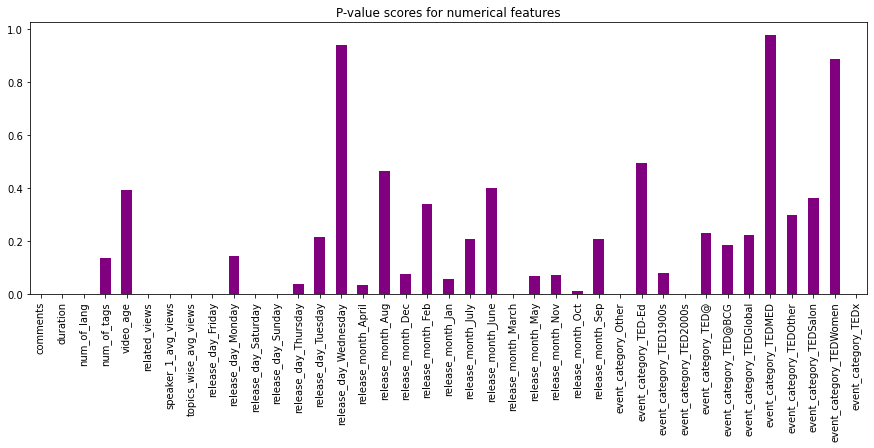

In [94]:
#The second array consists of p-values that we need
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='purple')
plt.title('P-value scores for numerical features')

From here we can see that a lot more work on feature selection is required.


From this bar plot we can reject some less immportant features on the basis of their p values.

From here using p value analysis we can drop those features having high p values.

In [95]:
#Let's make a list of important features.
ll=['comments', 'duration', 'num_of_lang', 'num_of_tags',
       'related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views']
len(ll)

8

In [96]:
n_df=final_df[ll]

Plotting the correlation matrix again.

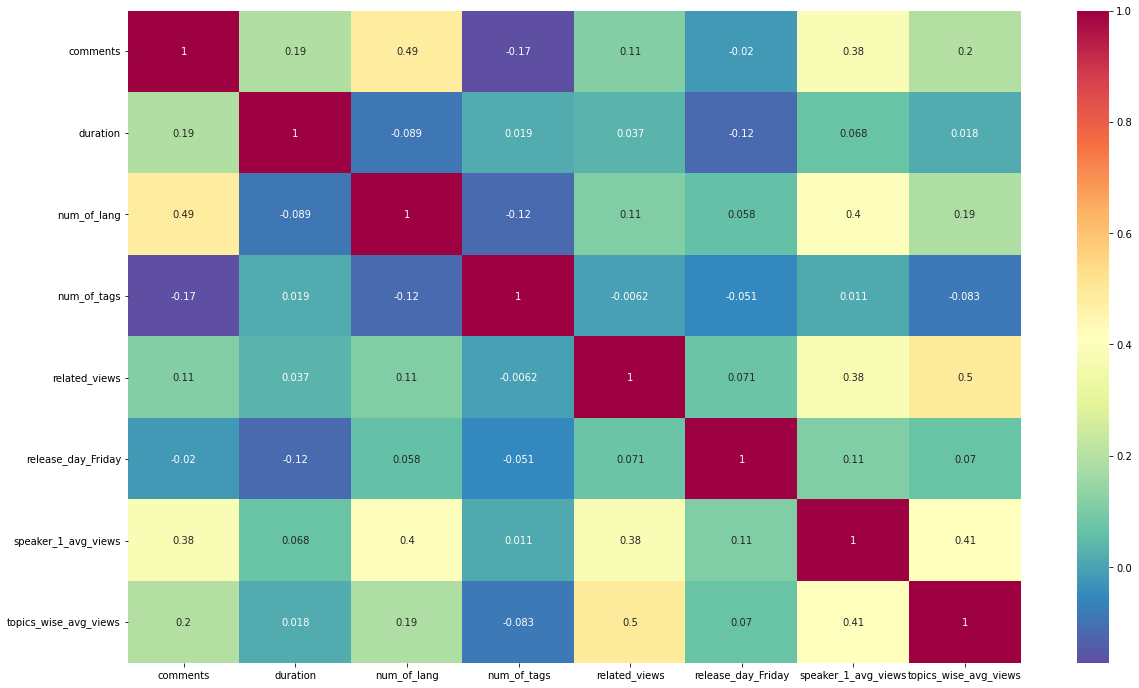

In [97]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
sns.heatmap(n_df.corr(),annot=True, cmap='Spectral_r')

In [98]:
n_df.columns

Index(['comments', 'duration', 'num_of_lang', 'num_of_tags', 'related_views',
       'release_day_Friday', 'speaker_1_avg_views', 'topics_wise_avg_views'],
      dtype='object')

# **Applying train test split**

In [99]:
X=n_df
y=df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=121212)

# **Data Scaling**

In [100]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Let's try to build a baseline model and we can improve from there.

# **Let's apply linear regression model.**

In [101]:
#fitting the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression().fit(X_train, y_train)

In [102]:
#predicting the values for test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

#calculating MSE and RMSE for test data set
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

MSE is 261723555366.1433
RMSE is 511589.24477176345
Training MAE: 261748.14
Test MAE: 286092.26


Despite of the fact that our features are not following linear assumption this model is giving a satisfactory score.

# **Random Forest Regressor**

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor

In [104]:
rf = RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
# print('Views mean: {:0.2f}'.format(views.mean()))
# print('Views std: {:0.2f}'.format(views.std()))
y_test.mean()

Training MAE: 127687.77
Test MAE: 245397.04


1662372.819201995

It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.

Hyperparameter Tuning using Randomized Search CV

In [105]:
#Random Forest Regressor
# Number of trees
n_estimators = [30,50,80,100,120,150]
# Maximum depth of trees
max_depth = [4,6,8,10,12]
# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150,200,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [106]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=80, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=80, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=80, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=80, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=80, n_estimators=30; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=80, n_estimators=150; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=80, n_estimators=150; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=80, n_estimators=150; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=80, n_estimators=150; total time=   1.1s
[CV] END max_depth=6, min_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200, 20],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]},
                   verbose=2)

In [107]:
rf_optimal_model = rf_random.best_estimator_

In [108]:
rf_optimal_model

RandomForestRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                      n_estimators=30)

In [109]:
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 197699.32
Test MAE: 255322.09


In [110]:
# make predictions for test data
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8622058289132806
For test set the R_Squared for RFforest is 0.7958169396546738 and adjusted R_Squared is 0.7954081647590876


Let's plot the feature importance score w.r.t. RF model

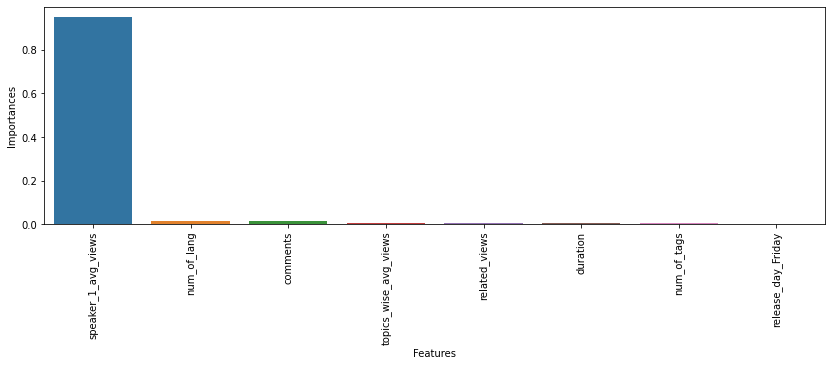

In [111]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

Applying XGboost regressor model

In [115]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [116]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[14:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.5s
[14:08:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.5s
[14:08:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.5s
[14:08:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.5s
[14:08:55] WARNING:

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [117]:
xgb_optimal_model = xgb_random.best_estimator_

In [118]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.8831138720977548
For test set the R_Squared for XGBoost is 0.7801659890249657 and adjusted R_Squared is 0.7797258808948856


In [119]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 187153.50
Test MAE: 262860.29


Let's plot the feature importance score w.r.t. XGBregressor model

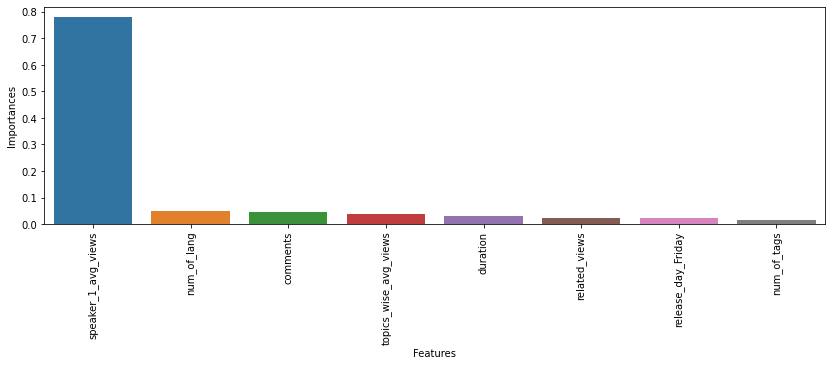

In [120]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()